In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

## Reading and Understanding the data


In [3]:
# Read data

bike = pd.read_csv("day.csv")

In [4]:
# Evaluate the imported dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Rows and Columns
bike.shape

(730, 16)

#### The data set contains 16 rows and 730 columns


In [6]:
# Information of dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### none of the rows have missing values 

#### Except dteday column, all are either float or integer type.


In [7]:
# Overveiw of the dataset
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### From the given data we can see that instant is an index column so we drop it

In [8]:
# droping instant column
bike.drop(['instant'],axis=1,inplace=True)


In [9]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### dteday is in date format but we already have yr and mnth columns(representing year and columns respectively), so its better to drop it.

In [10]:
# droping dteday column
bike.drop(['dteday'],axis=1,inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### we have cnt= casual+regestered, the correlation will be high and hence it will not help us to determine the target variable cnt.

In [11]:
#Droping Casual and regised column
bike.drop(['casual','registered'],axis=1,inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
# Renaming some columns for better understanding

bike.rename(columns={'hum':'humidity','cnt':'count'},inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### we observe that working ,yr and holiday are binary variable and they do not require any transformation

<AxesSubplot:xlabel='holiday', ylabel='count'>

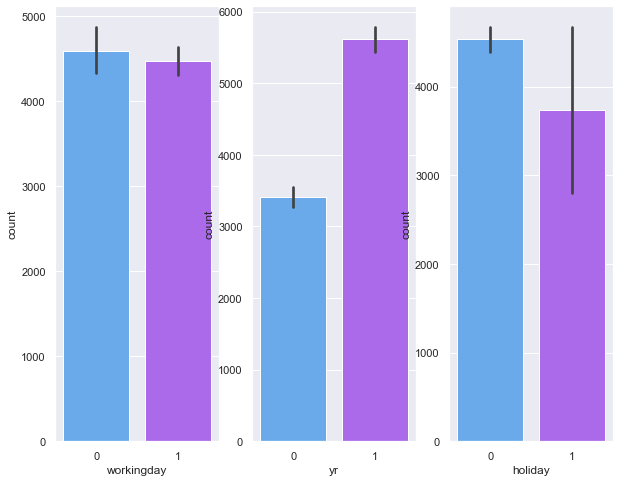

In [13]:
#visualizing Variables
plt.figure(figsize=(10,8))
plt.subplot(1,3,1)
sns.barplot(x='workingday',y='count',data=bike,palette='cool')
plt.subplot(1,3,2)
sns.barplot(x='yr',y='count',data=bike,palette='cool')
plt.subplot(1,3,3)
sns.barplot(x='holiday',y='count',data=bike,palette='cool')

#### 1. Bike Rental popularity has increased in 2019 when compared to 2018.
#### 2. Less number of bikes were rented on holidays.

## Data cleaning

In [14]:
# Check the datatypes before convertion
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [15]:

# Maping of variables with appropriate indicators
bike['season'] = bike['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
bike['weathersit'] = bike['weathersit'].map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'})
bike['mnth'] = bike['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weekday'] = bike['weekday'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


<AxesSubplot:xlabel='weathersit', ylabel='count'>

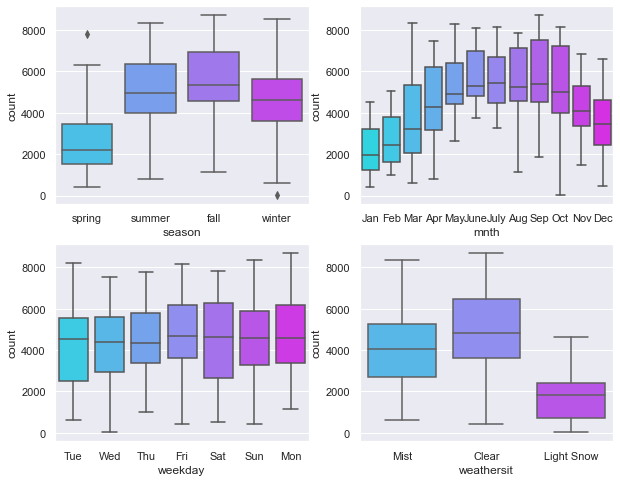

In [16]:
#visualizing categorical variables
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(x='season',y='count',data=bike,palette='cool')
plt.subplot(2,2,2)
sns.boxplot(x='mnth',y='count',data=bike,palette='cool')
plt.subplot(2,2,3)
sns.boxplot(x='weekday',y='count',data=bike,palette='cool')
plt.subplot(2,2,4)
sns.boxplot(x='weathersit',y='count',data=bike,palette='cool')



#### 1.Bikes seem to be rented more in Partly cloudy weather and very less during light snow.


#### 2.Bike Rentals are more during the Fall(Monsoon) season.

<AxesSubplot:xlabel='weathersit', ylabel='count'>

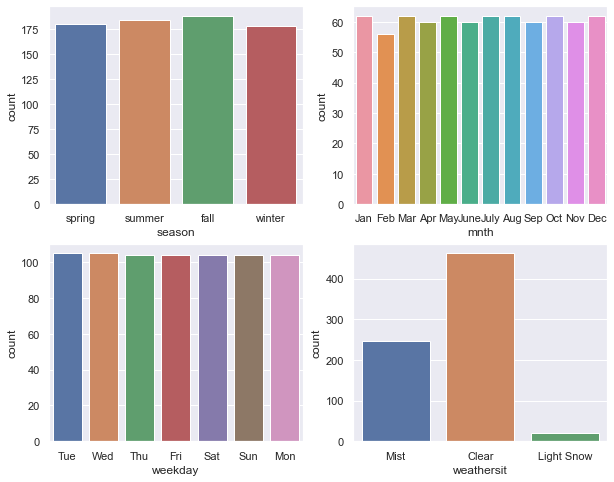

In [17]:
#----> visualizing categorical variables
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.countplot(x='season',data=bike)
plt.subplot(2,2,2)
sns.countplot(x='mnth',data=bike)
plt.subplot(2,2,3)
sns.countplot(x='weekday',data=bike)
plt.subplot(2,2,4)
sns.countplot(x='weathersit',data=bike)




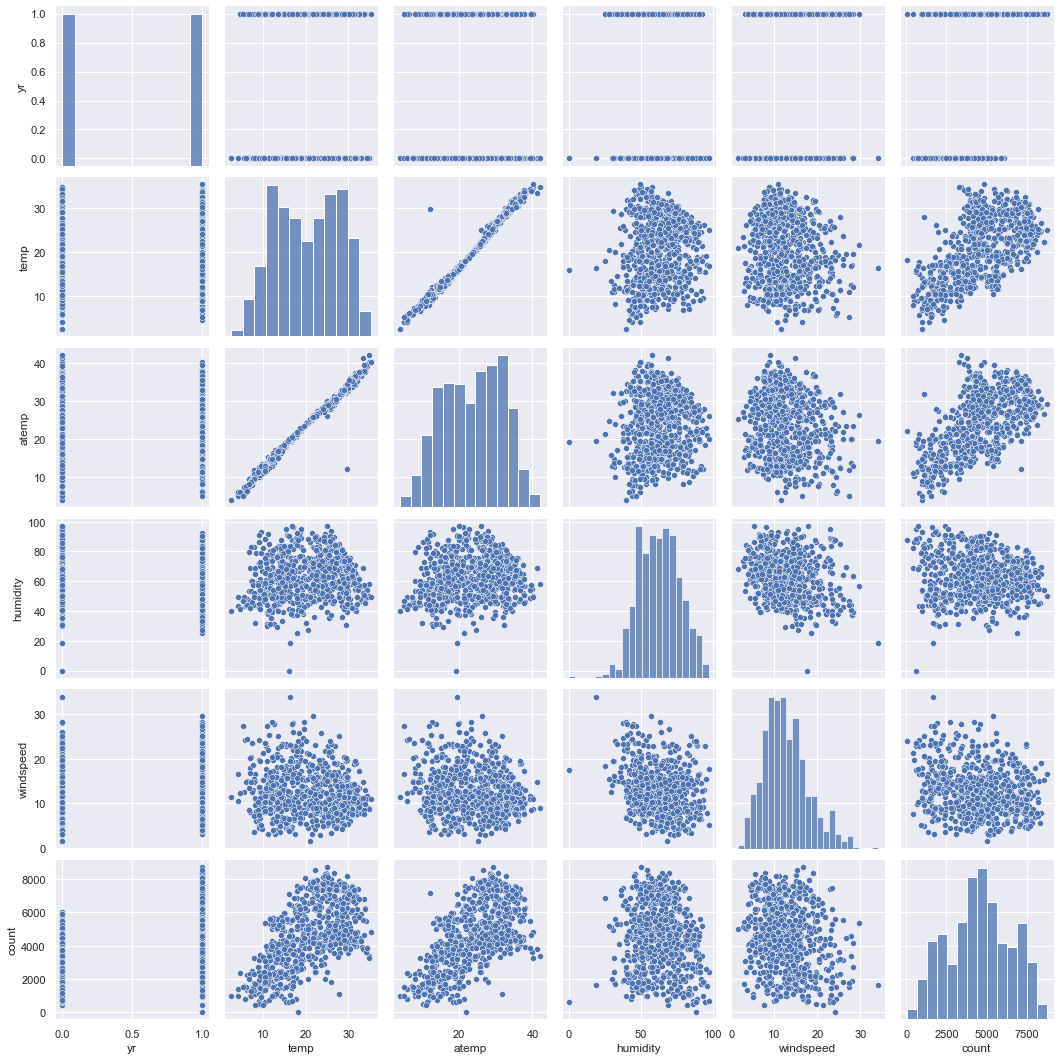

In [18]:
#Visualizing the Relationship among variables

sns.pairplot(data=bike,vars=[ 'yr','temp', 'atemp', 'humidity', 'windspeed', 'count'])

<AxesSubplot:>

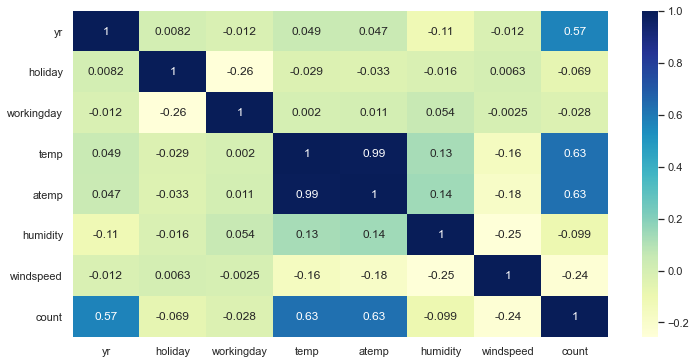

In [19]:
#checking for correlation between variables
plt.figure(figsize = (12,6))
sns.heatmap(bike.corr(),annot=True,cmap='YlGnBu')

#### It is observed that atemp and temp are highly correlated and one can be dropped to avoid multicollinearity.

In [20]:
# Droping atemp column
bike.drop('atemp',axis=1,inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Tue,1,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Wed,1,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Thu,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Fri,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Sat,1,Clear,9.305237,43.6957,12.522300,1600


## Creating Dummy Variables

#### CREATING DUMMY VARIABLES FOR CATEGORICAL DATA:

 1) Create Dummy variable and store it in diffrent data frame.
 
 2) Drop original variable for which the dummy was created.
 
 3) Drop first dummy variable for each set of dummies created.
 
 4) concatinate all into a singe data frame.

In [21]:
#Creating Dummy variables
Season=pd.get_dummies(bike['season'],drop_first=True)
Weather=pd.get_dummies(bike['weathersit'],drop_first=True)
Day=pd.get_dummies(bike['weekday'],drop_first=True)
Month=pd.get_dummies(bike['mnth'],drop_first=True)

#Concatination
bike=pd.concat([bike,Season],axis=1)
bike=pd.concat([bike,Weather],axis=1)
bike=pd.concat([bike,Day],axis=1)
bike=pd.concat([bike,Month],axis=1)
bike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   humidity    730 non-null    float64
 9   windspeed   730 non-null    float64
 10  count       730 non-null    int64  
 11  spring      730 non-null    uint8  
 12  summer      730 non-null    uint8  
 13  winter      730 non-null    uint8  
 14  Light Snow  730 non-null    uint8  
 15  Mist        730 non-null    uint8  
 16  Mon         730 non-null    uint8  
 17  Sat         730 non-null    uint8  
 18  Sun         730 non-null    uint8  
 19  Thu         730 non-null    u

In [22]:
#Deleting the orginal columns season.weathersit,weekday,mnth
bike.drop(['season'],axis=1,inplace=True)
bike.drop(['weathersit'],axis=1,inplace=True)
bike.drop(['weekday'],axis=1,inplace=True)
bike.drop(['mnth'],axis=1,inplace=True)
bike.head()

,yr,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [23]:
# summarising the changes after the dummy creation.

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   humidity    730 non-null    float64
 5   windspeed   730 non-null    float64
 6   count       730 non-null    int64  
 7   spring      730 non-null    uint8  
 8   summer      730 non-null    uint8  
 9   winter      730 non-null    uint8  
 10  Light Snow  730 non-null    uint8  
 11  Mist        730 non-null    uint8  
 12  Mon         730 non-null    uint8  
 13  Sat         730 non-null    uint8  
 14  Sun         730 non-null    uint8  
 15  Thu         730 non-null    uint8  
 16  Tue         730 non-null    uint8  
 17  Wed         730 non-null    uint8  
 18  Aug         730 non-null    uint8  
 19  Dec         730 non-null    u

In [24]:
bike.shape

(730, 29)

#### number of columns=29 

## Splitting the Data into Training and Testing Sets

In [25]:
# train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(219, 29)


#### The training and testing data set contains 510 and 219 values respectively since the bike dataset was split into 70:30 ratio.

## Scaling the numerical data

In [26]:
#instantiate and object
scaler=MinMaxScaler()

#Creating list of neumaric variables
num_vars=['temp','humidity','windspeed','count']

#Fitting on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

bike_train.head()

,yr,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
bike_train.describe()

,yr,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
#creating X and y
y_train = bike_train.pop('count')
X_train = bike_train

In [29]:
X_train.head()

,yr,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,Light Snow,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: count, dtype: float64

In [31]:
# RFE approach will be used in initial stage
# Start with 15 variables and will use mixed approach

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [32]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Mon', False, 5),
 ('Sat', False, 12),
 ('Sun', False, 4),
 ('Thu', False, 10),
 ('Tue', False, 8),
 ('Wed', False, 7),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1)]

In [33]:
#Checking selected columns

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'summer',
       'winter', 'Light Snow', 'Mist', 'Dec', 'Jan', 'July', 'Nov', 'Sep'],
      dtype='object')

In [34]:
#looking at rejected columns
X_train.columns[~rfe.support_]


Index(['workingday', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Aug', 'Feb',
       'June', 'Mar', 'May', 'Oct'],
      dtype='object')

In [35]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


## Building the model with statsmodel:

In [36]:
#Calculating Vif:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
9,Mist,2.32
0,yr,2.09
13,Nov,1.83
11,Jan,1.75


#### humidity variable has a very high VIF so we drop it


In [37]:
#Droping humidity variable
X_train_rfe=X_train_rfe.drop(['humidity'],axis=1)


In [38]:
#adding a constant variable
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [39]:
#Running the linear model
lm=sm.OLS(y_train,X_train_rfe1).fit()

In [40]:
#Summary of linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.57e-186
Time:                        23:38:29   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2466      0.032      7.679      0.000       0.184       0.310
yr             0.2343      0.008     28.709      0.000       0.218       0.250
holiday       -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp           0.4377      0.036     12.083      0.000       0.366       0.509
windspeed     -0.1586      0.025     -6.290      0.000      -0.208      -0.109
spring        -0.0716      0.021     -3.337      0.001      -0.114      -0.029
summer         0.0333      0.015      2.148      0.032       0.003       0.064
winter         0.0887      0.018      4.951      0.000       0.053       0.124
Light Snow    -0.2929      0.025    -11.908      0.000      -0.341      -0.245
Mist          -0.0814      0.009     -9.359      0.000      -0.099      -0.064
Dec           -0.0445      0.018     -2.520      0.012      -0.079      -0.010
Jan           -0.0503      0.018     -2.738      0.006      -0.086      -0.014
July          -0.0504      0.018     -2.725      0.007      -0.087      -0.014
Nov           -0.0419      0.019     -2.198      0.028      -0.079      -0.004
Sep            0.0682      0.017      3.992      0.000       0.035       0.102
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
#Calculating Vif:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
12,Nov,1.80
10,Jan,1.66
11,July,1.59
8,Mist,1.56


#### Temp variable has high VIF so we drop it

In [42]:
#Droping temp column
X_train_rfe=X_train_rfe.drop(['temp'],axis=1)


In [43]:
#adding a constant variable
X_train_rfe2 = sm.add_constant(X_train_rfe)

In [44]:
#Running the linear model for 2nd time
lm=sm.OLS(y_train,X_train_rfe2).fit()

In [45]:
#Summary of linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.8
Date:                Mon, 10 May 2021   Prob (F-statistic):          5.50e-160
Time:                        23:38:29   Log-Likelihood:                 439.69
No. Observations:                 510   AIC:                            -851.4
Df Residuals:                     496   BIC:                            -792.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5961      0.016     37.557      0.000       0.565       0.627
yr             0.2454      0.009     26.627      0.000       0.227       0.264
holiday       -0.0856      0.030     -2.896      0.004      -0.144      -0.028
windspeed     -0.1903      0.029     -6.675      0.000      -0.246      -0.134
spring        -0.2503      0.018    -14.146      0.000      -0.285      -0.216
summer        -0.0511      0.016     -3.252      0.001      -0.082      -0.020
winter        -0.0213      0.018     -1.216      0.225      -0.056       0.013
Light Snow    -0.3127      0.028    -11.207      0.000      -0.367      -0.258
Mist          -0.0882      0.010     -8.938      0.000      -0.108      -0.069
Dec           -0.1100      0.019     -5.752      0.000      -0.148      -0.072
Jan           -0.1202      0.020     -6.069      0.000      -0.159      -0.081
July          -0.0186      0.021     -0.894      0.372      -0.059       0.022
Nov           -0.1013      0.021     -4.847      0.000      -0.142      -0.060
Sep            0.0530      0.019      2.735      0.006       0.015       0.091
==============================================================================
Omnibus:                       56.767   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.173
Skew:                          -0.589   Prob(JB):                     4.44e-30
Kurtosis:                       5.230   Cond. No.                         9.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Summer variable coeff has changed from positive to negetive, that cannot be possible, so we will drop it

In [46]:
#Droping summer column
X_train_rfe=X_train_rfe.drop(['summer'],axis=1)

In [47]:
#Vif calculation
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.63
4,winter,2.52
3,spring,2.30
10,Nov,1.78
0,yr,1.76
8,Jan,1.64
6,Mist,1.46
7,Dec,1.45
11,Sep,1.12
9,July,1.10


#### Windspeed has high VIF >2 so we drop it


In [48]:
#Droping windspeed column
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

In [49]:
#Running the model for 3rd time
X_train_rfe3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     148.5
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.27e-149
Time:                        23:38:30   Log-Likelihood:                 409.23
No. Observations:                 510   AIC:                            -794.5
Df Residuals:                     498   BIC:                            -743.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5020      0.010     49.060      0.000       0.482       0.522
yr             0.2456      0.010     25.154      0.000       0.226       0.265
holiday       -0.0886      0.031     -2.829      0.005      -0.150      -0.027
spring        -0.2340      0.015    -15.591      0.000      -0.263      -0.205
winter         0.0134      0.016      0.835      0.404      -0.018       0.045
Light Snow    -0.3320      0.029    -11.288      0.000      -0.390      -0.274
Mist          -0.0889      0.010     -8.507      0.000      -0.109      -0.068
Dec           -0.0988      0.020     -4.890      0.000      -0.138      -0.059
Jan           -0.1037      0.021     -4.977      0.000      -0.145      -0.063
July           0.0247      0.019      1.274      0.203      -0.013       0.063
Nov           -0.1026      0.022     -4.645      0.000      -0.146      -0.059
Sep            0.0931      0.019      5.000      0.000       0.057       0.130
==============================================================================
Omnibus:                       65.504   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.197
Skew:                          -0.652   Prob(JB):                     4.94e-37
Kurtosis:                       5.483   Cond. No.                         8.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### July variable has very high p value, so we will drop it.

In [50]:
#Droping july column
X_train_rfe=X_train_rfe.drop(['July'],axis=1)

#### Building the model again without July column

In [51]:
#Running the model for 4th time
X_train_rfe4 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe4).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     162.9
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.87e-150
Time:                        23:38:30   Log-Likelihood:                 408.40
No. Observations:                 510   AIC:                            -794.8
Df Residuals:                     499   BIC:                            -748.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5065      0.010     52.829      0.000       0.488       0.525
yr             0.2456      0.010     25.139      0.000       0.226       0.265
holiday       -0.0893      0.031     -2.849      0.005      -0.151      -0.028
spring        -0.2381      0.015    -16.224      0.000      -0.267      -0.209
winter         0.0098      0.016      0.621      0.535      -0.021       0.041
Light Snow    -0.3319      0.029    -11.280      0.000      -0.390      -0.274
Mist          -0.0903      0.010     -8.683      0.000      -0.111      -0.070
Dec           -0.0991      0.020     -4.903      0.000      -0.139      -0.059
Jan           -0.1036      0.021     -4.967      0.000      -0.145      -0.063
Nov           -0.1031      0.022     -4.666      0.000      -0.147      -0.060
Sep            0.0899      0.018      4.870      0.000       0.054       0.126
==============================================================================
Omnibus:                       66.755   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.008
Skew:                          -0.665   Prob(JB):                     1.21e-37
Kurtosis:                       5.496   Cond. No.                         8.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### No change in the R square value, so july column did not have any significance

In [52]:
# calculating vif
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,winter,2.42
2,spring,1.89
8,Nov,1.78
7,Jan,1.62
6,Dec,1.45
0,yr,1.41
5,Mist,1.36
9,Sep,1.10
1,holiday,1.06
4,Light Snow,1.06


#### Winter column has high p-value as well as vif value, so we drop it

In [53]:
#Dropping winter column
X_train_rfe=X_train_rfe.drop(['winter'],axis=1)

In [54]:
#Running the model for 5th time
X_train_rfe5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     181.2
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.39e-151
Time:                        23:38:30   Log-Likelihood:                 408.20
No. Observations:                 510   AIC:                            -796.4
Df Residuals:                     500   BIC:                            -754.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5082      0.009     55.192      0.0

In [55]:
#calculating Vif
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



,Features,VIF
2,spring,1.80
6,Jan,1.61
0,yr,1.36
4,Mist,1.32
7,Nov,1.10
8,Sep,1.10
5,Dec,1.09
1,holiday,1.06
3,Light Snow,1.02


#### Adding workingday column to see if the model improves

In [56]:
#Adding workingday column
X_train_rfe['workingday']=X_train['workingday']
X_train_rfe.head()


,yr,holiday,spring,Light Snow,Mist,Dec,Jan,Nov,Sep,workingday
653,1,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,1
426,1,0,1,0,1,0,0,0,0,0
728,1,0,1,0,0,1,0,0,0,1
482,1,0,0,0,1,0,0,0,0,0


In [57]:
#Running the model for 6th time
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     165.0
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.60e-151
Time:                        23:38:30   Log-Likelihood:                 410.84
No. Observations:                 510   AIC:                            -799.7
Df Residuals:                     499   BIC:                            -753.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5275      0.012     42.244      0.000       0.503       0.552
yr             0.2454      0.010     25.237      0.000       0.226       0.264
holiday       -0.1084      0.032     -3.356      0.001      -0.172      -0.045
spring        -0.2413      0.014    -17.343      0.000      -0.269      -0.214
Light Snow    -0.3302      0.029    -11.379      0.000      -0.387      -0.273
Mist          -0.0918      0.010     -8.859      0.000      -0.112      -0.071
Dec           -0.0941      0.018     -5.287      0.000      -0.129      -0.059
Jan           -0.1022      0.021     -4.940      0.000      -0.143      -0.062
Nov           -0.0930      0.018     -5.178      0.000      -0.128      -0.058
Sep            0.0894      0.018      4.866      0.000       0.053       0.125
workingday    -0.0253      0.011     -2.278      0.023      -0.047      -0.003
==============================================================================
Omnibus:                       66.122   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.883
Skew:                          -0.682   Prob(JB):                     8.57e-35
Kurtosis:                       5.349   Cond. No.                         9.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### No major improvement in R-suared value as well as workingday has high p value. so, We need to drop it

In [58]:
#Droping workingday column
X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)

#### Adding Aug variable to see if the model improves

In [59]:
#Adding Aug column
X_train_rfe['Aug']=X_train['Aug']
X_train_rfe.head()

,yr,holiday,spring,Light Snow,Mist,Dec,Jan,Nov,Sep,Aug
653,1,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0
426,1,0,1,0,1,0,0,0,0,0
728,1,0,1,0,0,1,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0


In [60]:
#Running the model for 7th time
X_train_rfe7 = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train,X_train_rfe7).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     168.1
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.03e-152
Time:                        23:38:30   Log-Likelihood:                 414.49
No. Observations:                 510   AIC:                            -807.0
Df Residuals:                     499   BIC:                            -760.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4983      0.010     52.328      0.000       0.480       0.517
yr             0.2443      0.010     25.291      0.000       0.225       0.263
holiday       -0.0878      0.031     -2.835      0.005      -0.149      -0.027
spring        -0.2316      0.014    -16.477      0.000      -0.259      -0.204
Light Snow    -0.3237      0.029    -11.217      0.000      -0.380      -0.267
Mist          -0.0907      0.010     -8.842      0.000      -0.111      -0.071
Dec           -0.0855      0.018     -4.801      0.000      -0.120      -0.050
Jan           -0.1010      0.021     -4.917      0.000      -0.141      -0.061
Nov           -0.0849      0.018     -4.701      0.000      -0.120      -0.049
Sep            0.1007      0.018      5.447      0.000       0.064       0.137
Aug            0.0604      0.017      3.529      0.000       0.027       0.094
==============================================================================
Omnibus:                       62.853   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.415
Skew:                          -0.618   Prob(JB):                     1.98e-36
Kurtosis:                       5.492   Cond. No.                         8.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# Calculating Vif
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,spring,1.81
6,Jan,1.61
0,yr,1.45
4,Mist,1.35
9,Aug,1.12
7,Nov,1.11
8,Sep,1.10
5,Dec,1.09
1,holiday,1.06
3,Light Snow,1.02


#### The model improved, so we will keep the Aug column


#### Adding Oct variable to see if model improves

In [62]:
#Adding Oct coulmn
X_train_rfe['Oct']=X_train['Oct']
X_train_rfe.head()

,yr,holiday,spring,Light Snow,Mist,Dec,Jan,Nov,Sep,Aug,Oct
653,1,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,1,0,0,0,0,0,0
728,1,0,1,0,0,1,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0


In [63]:
#Running the model for 8th time
X_train_rfe8 = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_rfe8).fit()
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     153.1
Date:                Mon, 10 May 2021   Prob (F-statistic):          6.14e-152
Time:                        23:38:30   Log-Likelihood:                 415.32
No. Observations:                 510   AIC:                            -806.6
Df Residuals:                     498   BIC:                            -755.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4942      0.010     49.107      0.000       0.474       0.514
yr             0.2445      0.010     25.325      0.000       0.226       0.263
holiday       -0.0894      0.031     -2.886      0.004      -0.150      -0.029
spring        -0.2277      0.014    -15.830      0.000      -0.256      -0.199
Light Snow    -0.3294      0.029    -11.286      0.000      -0.387      -0.272
Mist          -0.0914      0.010     -8.902      0.000      -0.112      -0.071
Dec           -0.0822      0.018     -4.570      0.000      -0.117      -0.047
Jan           -0.1005      0.021     -4.895      0.000      -0.141      -0.060
Nov           -0.0802      0.018     -4.355      0.000      -0.116      -0.044
Sep            0.1053      0.019      5.594      0.000       0.068       0.142
Aug            0.0647      0.017      3.711      0.000       0.030       0.099
Oct            0.0234      0.018      1.272      0.204      -0.013       0.060
==============================================================================
Omnibus:                       68.501   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.726
Skew:                          -0.655   Prob(JB):                     6.33e-42
Kurtosis:                       5.686   Cond. No.                         8.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Adding Oct column did not improve the model as well as it has high P-value, so we drop it.

In [64]:
#Droping Oct column
X_train_rfe=X_train_rfe.drop(['Oct'],axis=1)

#### Adding Feb variable to see if model improves

In [65]:
#Adding Feb coulmn
X_train_rfe['Feb']=X_train['Feb']
X_train_rfe.head()

,yr,holiday,spring,Light Snow,Mist,Dec,Jan,Nov,Sep,Aug,Feb
653,1,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,1,0,0,0,0,0,0
728,1,0,1,0,0,1,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0


In [66]:
#Running the model for 9th time
X_train_rfe9 = sm.add_constant(X_train_rfe)
lm9 = sm.OLS(y_train,X_train_rfe9).fit()
lm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     158.1
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.34e-154
Time:                        23:38:30   Log-Likelihood:                 421.62
No. Observations:                 510   AIC:                            -819.2
Df Residuals:                     498   BIC:                            -768.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4997      0.009     53.118      0.000       0.481       0.518
yr             0.2441      0.010     25.604      0.000       0.225       0.263
holiday       -0.0820      0.031     -2.677      0.008      -0.142      -0.022
spring        -0.1908      0.018    -10.829      0.000      -0.225      -0.156
Light Snow    -0.3227      0.028    -11.329      0.000      -0.379      -0.267
Mist          -0.0898      0.010     -8.861      0.000      -0.110      -0.070
Dec           -0.0996      0.018     -5.544      0.000      -0.135      -0.064
Jan           -0.1438      0.023     -6.183      0.000      -0.190      -0.098
Nov           -0.0870      0.018     -4.882      0.000      -0.122      -0.052
Sep            0.0986      0.018      5.405      0.000       0.063       0.134
Aug            0.0588      0.017      3.478      0.001       0.026       0.092
Feb           -0.0937      0.025     -3.759      0.000      -0.143      -0.045
==============================================================================
Omnibus:                       74.179   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.490
Skew:                          -0.759   Prob(JB):                     4.74e-39
Kurtosis:                       5.449   Cond. No.                         8.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# Calculating Vif
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,spring,3.13
6,Jan,2.12
10,Feb,1.84
0,yr,1.45
4,Mist,1.35
5,Dec,1.14
9,Aug,1.12
7,Nov,1.11
8,Sep,1.10
1,holiday,1.06


#### Adding Feb column significant improved the model, so will keep it

#### Adding Mar variable to see if model improves

In [68]:
#Adding Mar variable
X_train_rfe['Mar']=X_train['Mar']
X_train_rfe.head()

,yr,holiday,spring,Light Snow,Mist,Dec,Jan,Nov,Sep,Aug,Feb,Mar
653,1,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,1,0,0,0,0,0,0,1
728,1,0,1,0,0,1,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0


In [69]:
#Running the model for 10th time
X_train_rfe10 = sm.add_constant(X_train_rfe)
lm10 = sm.OLS(y_train,X_train_rfe10).fit()
lm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     149.6
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.71e-156
Time:                        23:38:30   Log-Likelihood:                 428.28
No. Observations:                 510   AIC:                            -830.6
Df Residuals:                     497   BIC:                            -775.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5078      0.010     53.123      0.000       0.489       0.527
yr             0.2443      0.009     25.930      0.000       0.226       0.263
holiday       -0.0862      0.030     -2.849      0.005      -0.146      -0.027
spring        -0.1341      0.023     -5.728      0.000      -0.180      -0.088
Light Snow    -0.3191      0.028    -11.331      0.000      -0.374      -0.264
Mist          -0.0878      0.010     -8.752      0.000      -0.107      -0.068
Dec           -0.1257      0.019     -6.562      0.000      -0.163      -0.088
Jan           -0.2094      0.029     -7.161      0.000      -0.267      -0.152
Nov           -0.0956      0.018     -5.380      0.000      -0.131      -0.061
Sep            0.0897      0.018      4.927      0.000       0.054       0.125
Aug            0.0499      0.017      2.954      0.003       0.017       0.083
Feb           -0.1591      0.031     -5.212      0.000      -0.219      -0.099
Mar           -0.0815      0.022     -3.628      0.000      -0.126      -0.037
==============================================================================
Omnibus:                       79.633   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.416
Skew:                          -0.738   Prob(JB):                     4.60e-52
Kurtosis:                       5.992   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
#Calculating Vif
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,spring,6.06
6,Jan,3.34
10,Feb,2.75
11,Mar,2.13
0,yr,1.48
4,Mist,1.38
5,Dec,1.28
9,Aug,1.12
7,Nov,1.11
8,Sep,1.11


#### No signifcant improvement in R-squared value, so we will not conside Mar column-- Drop it

In [71]:
#Droping Mar column
X_train_rfe=X_train_rfe.drop(['Mar'],axis=1)

#### Adding temp variable to see if model improves

In [72]:
#Add temp variable
X_train_rfe['temp']=X_train['temp']
X_train_rfe.head()

,yr,holiday,spring,Light Snow,Mist,Dec,Jan,Nov,Sep,Aug,Feb,temp
653,1,0,0,0,0,0,0,0,0,0,0,0.509887
576,1,0,0,0,0,0,0,0,0,0,0,0.815169
426,1,0,1,0,1,0,0,0,0,0,0,0.442393
728,1,0,1,0,0,1,0,0,0,0,0,0.245101
482,1,0,0,0,1,0,0,0,0,0,0,0.395666


In [73]:
#Running the model for 11th time
X_train_rfe11 = sm.add_constant(X_train_rfe)
lm11 = sm.OLS(y_train,X_train_rfe11).fit()
lm11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     180.9
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.31e-172
Time:                        23:38:30   Log-Likelihood:                 467.03
No. Observations:                 510   AIC:                            -908.1
Df Residuals:                     497   BIC:                            -853.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2964      0.022     13.247      0.000       0.252       0.340
yr             0.2364      0.009     26.970      0.000       0.219       0.254
holiday       -0.0885      0.028     -3.155      0.002      -0.144      -0.033
spring        -0.1337      0.017     -7.795      0.000      -0.167      -0.100
Light Snow    -0.2976      0.026    -11.356      0.000      -0.349      -0.246
Mist          -0.0776      0.009     -8.287      0.000      -0.096      -0.059
Dec           -0.0223      0.018     -1.224      0.222      -0.058       0.014
Jan           -0.0674      0.023     -2.972      0.003      -0.112      -0.023
Nov           -0.0108      0.018     -0.600      0.549      -0.046       0.025
Sep            0.0770      0.017      4.571      0.000       0.044       0.110
Aug            0.0041      0.016      0.251      0.802      -0.028       0.036
Feb           -0.0403      0.023     -1.718      0.086      -0.086       0.006
temp           0.3204      0.033      9.843      0.000       0.256       0.384
==============================================================================
Omnibus:                       63.940   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.183
Skew:                          -0.669   Prob(JB):                     6.64e-33
Kurtosis:                       5.277   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Nov column has high p value, we will drop it

In [74]:
#Dropping Nov column
X_train_rfe=X_train_rfe.drop(['Nov'],axis=1)

In [75]:
#Running the model for 12th time
X_train_rfe12 = sm.add_constant(X_train_rfe)
lm12 = sm.OLS(y_train,X_train_rfe12).fit()
lm12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     197.6
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.09e-173
Time:                        23:38:30   Log-Likelihood:                 466.85
No. Observations:                 510   AIC:                            -909.7
Df Residuals:                     498   BIC:                            -858.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2897      0.019     14.963      0.000       0.252       0.328
yr             0.2363      0.009     26.980      0.000       0.219       0.254
holiday       -0.0908      0.028     -3.275      0.001      -0.145      -0.036
spring        -0.1311      0.017     -7.906      0.000      -0.164      -0.098
Light Snow    -0.2972      0.026    -11.351      0.000      -0.349      -0.246
Mist          -0.0773      0.009     -8.273      0.000      -0.096      -0.059
Dec           -0.0192      0.017     -1.099      0.272      -0.053       0.015
Jan           -0.0650      0.022     -2.914      0.004      -0.109      -0.021
Sep            0.0780      0.017      4.649      0.000       0.045       0.111
Aug            0.0041      0.016      0.248      0.805      -0.028       0.036
Feb           -0.0385      0.023     -1.656      0.098      -0.084       0.007
temp           0.3287      0.029     11.185      0.000       0.271       0.386
==============================================================================
Omnibus:                       63.001   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.068
Skew:                          -0.660   Prob(JB):                     1.91e-32
Kurtosis:                       5.266   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Resulted in her p value of Aug variable. so, Drop it

In [76]:
#droping Aug column
X_train_rfe=X_train_rfe.drop(['Aug'],axis=1)

In [77]:
#Running the model for 13th time
X_train_rfe13 = sm.add_constant(X_train_rfe)
lm13 = sm.OLS(y_train,X_train_rfe13).fit()
lm13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     217.7
Date:                Mon, 10 May 2021   Prob (F-statistic):          7.40e-175
Time:                        23:38:30   Log-Likelihood:                 466.82
No. Observations:                 510   AIC:                            -911.6
Df Residuals:                     499   BIC:                            -865.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2886      0.019     15.343      0.000       0.252       0.326
yr             0.2363      0.009     27.007      0.000       0.219       0.254
holiday       -0.0910      0.028     -3.283      0.001      -0.145      -0.037
spring        -0.1311      0.017     -7.914      0.000      -0.164      -0.099
Light Snow    -0.2974      0.026    -11.369      0.000      -0.349      -0.246
Mist          -0.0771      0.009     -8.282      0.000      -0.095      -0.059
Dec           -0.0190      0.017     -1.091      0.276      -0.053       0.015
Jan           -0.0645      0.022     -2.906      0.004      -0.108      -0.021
Sep            0.0772      0.016      4.696      0.000       0.045       0.109
Feb           -0.0382      0.023     -1.646      0.100      -0.084       0.007
temp           0.3314      0.027     12.154      0.000       0.278       0.385
==============================================================================
Omnibus:                       63.110   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.543
Skew:                          -0.662   Prob(JB):                     2.49e-32
Kurtosis:                       5.257   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### dec has high p value, drop it

In [78]:
#Droping Dec coulmn
X_train_rfe=X_train_rfe.drop(['Dec'],axis=1)

In [79]:
#Running the model for 14th time
X_train_rfe14 = sm.add_constant(X_train_rfe)
lm14 = sm.OLS(y_train,X_train_rfe14).fit()
lm14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     241.7
Date:                Mon, 10 May 2021   Prob (F-statistic):          8.37e-176
Time:                        23:38:30   Log-Likelihood:                 466.21
No. Observations:                 510   AIC:                            -912.4
Df Residuals:                     500   BIC:                            -870.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2802      0.017     16.311      0.000       0.246       0.314
yr             0.2363      0.009     27.001      0.000       0.219       0.254
holiday       -0.0907      0.028     -3.271      0.001      -0.145      -0.036
spring        -0.1325      0.017     -8.023      0.000      -0.165      -0.100
Light Snow    -0.2960      0.026    -11.327      0.000      -0.347      -0.245
Mist          -0.0771      0.009     -8.273      0.000      -0.095      -0.059
Jan           -0.0571      0.021     -2.702      0.007      -0.099      -0.016
Sep            0.0778      0.016      4.736      0.000       0.046       0.110
Feb           -0.0316      0.022     -1.412      0.159      -0.076       0.012
temp           0.3424      0.025     13.505      0.000       0.293       0.392
==============================================================================
Omnibus:                       61.742   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.057
Skew:                          -0.647   Prob(JB):                     8.62e-32
Kurtosis:                       5.249   Cond. No.                         9.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Feb has high p value, we will drop it

In [80]:
#Droping Feb variable
X_train_rfe=X_train_rfe.drop(['Feb'],axis=1)

In [81]:
#Running the model for 15th time
X_train_rfe15 = sm.add_constant(X_train_rfe)
lm15 = sm.OLS(y_train,X_train_rfe15).fit()
lm15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     271.1
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.33e-176
Time:                        23:38:30   Log-Likelihood:                 465.19
No. Observations:                 510   AIC:                            -912.4
Df Residuals:                     501   BIC:                            -874.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2781      0.017     16.233      0.000       0.244       0.312
yr             0.2361      0.009     26.957      0.000       0.219       0.253
holiday       -0.0923      0.028     -3.328      0.001      -0.147      -0.038
spring        -0.1451      0.014    -10.432      0.000      -0.172      -0.118
Light Snow    -0.2960      0.026    -11.318      0.000      -0.347      -0.245
Mist          -0.0771      0.009     -8.273      0.000      -0.095      -0.059
Jan           -0.0430      0.019     -2.306      0.022      -0.080      -0.006
Sep            0.0775      0.016      4.714      0.000       0.045       0.110
temp           0.3462      0.025     13.719      0.000       0.297       0.396
==============================================================================
Omnibus:                       58.901   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.158
Skew:                          -0.613   Prob(JB):                     6.06e-31
Kurtosis:                       5.247   Cond. No.                         9.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
#Calculating Vif
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,temp,2.37
0,yr,2.00
2,spring,1.74
5,Jan,1.60
4,Mist,1.45
6,Sep,1.15
1,holiday,1.03
3,Light Snow,1.03


#### Adding sunday and see of it improves the model


In [83]:
#Adding Sun column
X_train_rfe['Sun']=X_train['Sun']
X_train_rfe.head()

,yr,holiday,spring,Light Snow,Mist,Jan,Sep,temp,Sun
653,1,0,0,0,0,0,0,0.509887,0
576,1,0,0,0,0,0,0,0.815169,0
426,1,0,1,0,1,0,0,0.442393,0
728,1,0,1,0,0,0,0,0.245101,0
482,1,0,0,0,1,0,0,0.395666,0


In [84]:
#Running the model for 16th time
X_train_rfe16 = sm.add_constant(X_train_rfe)
lm16 = sm.OLS(y_train,X_train_rfe16).fit()
lm16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     241.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.12e-175
Time:                        23:38:30   Log-Likelihood:                 465.91
No. Observations:                 510   AIC:                            -911.8
Df Residuals:                     500   BIC:                            -869.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2769      0.017     16.142      0.000       0.243       0.311
yr             0.2363      0.009     26.986      0.000       0.219       0.254
holiday       -0.0915      0.028     -3.303      0.001      -0.146      -0.037
spring        -0.1454      0.014    -10.457      0.000      -0.173      -0.118
Light Snow    -0.2973      0.026    -11.362      0.000      -0.349      -0.246
Mist          -0.0775      0.009     -8.313      0.000      -0.096      -0.059
Jan           -0.0432      0.019     -2.320      0.021      -0.080      -0.007
Sep            0.0773      0.016      4.707      0.000       0.045       0.110
temp           0.3450      0.025     13.668      0.000       0.295       0.395
Sun            0.0154      0.013      1.186      0.236      -0.010       0.041
==============================================================================
Omnibus:                       57.843   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.316
Skew:                          -0.608   Prob(JB):                     6.82e-30
Kurtosis:                       5.201   Cond. No.                         9.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### No improvement in R -Squared value, Drop Sun variable

In [85]:
#Dropping Sun column
X_train_rfe=X_train_rfe.drop(['Sun'],axis=1)

In [86]:
#Droping Jan column
X_train_rfe=X_train_rfe.drop(['Jan'],axis=1)

In [87]:
#Running the model for 17th time
X_train_rfe17 = sm.add_constant(X_train_rfe)
lm17 = sm.OLS(y_train,X_train_rfe17).fit()
lm17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     306.5
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.02e-176
Time:                        23:38:30   Log-Likelihood:                 462.50
No. Observations:                 510   AIC:                            -909.0
Df Residuals:                     502   BIC:                            -875.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2725      0.017     16.000      0.000       0.239       0.306
yr             0.2356      0.009     26.790      0.000       0.218       0.253
holiday       -0.0924      0.028     -3.319      0.001      -0.147      -0.038
spring        -0.1576      0.013    -12.243      0.000      -0.183      -0.132
Light Snow    -0.2934      0.026    -11.182      0.000      -0.345      -0.242
Mist          -0.0781      0.009     -8.352      0.000      -0.097      -0.060
Sep            0.0766      0.017      4.643      0.000       0.044       0.109
temp           0.3562      0.025     14.267      0.000       0.307       0.405
==============================================================================
Omnibus:                       55.490   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.758
Skew:                          -0.577   Prob(JB):                     2.45e-29
Kurtosis:                       5.207   Cond. No.                         9.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Adding Tue Column to see if the model improves

In [88]:
#Adding Tue Column 
X_train_rfe['Tue']=X_train['Tue']
X_train_rfe.head()

,yr,holiday,spring,Light Snow,Mist,Sep,temp,Tue
653,1,0,0,0,0,0,0.509887,0
576,1,0,0,0,0,0,0.815169,0
426,1,0,1,0,1,0,0.442393,0
728,1,0,1,0,0,0,0.245101,1
482,1,0,0,0,1,0,0.395666,0


In [89]:
#Running the model for 18th time
X_train_rfe18 = sm.add_constant(X_train_rfe)
lm18 = sm.OLS(y_train,X_train_rfe18).fit()
lm18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     270.5
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.19e-176
Time:                        23:38:30   Log-Likelihood:                 464.68
No. Observations:                 510   AIC:                            -911.4
Df Residuals:                     501   BIC:                            -873.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2783      0.017     16.177      0.000       0.245       0.312
yr             0.2350      0.009     26.804      0.000       0.218       0.252
holiday       -0.0966      0.028     -3.471      0.001      -0.151      -0.042
spring        -0.1580      0.013    -12.314      0.000      -0.183      -0.133
Light Snow    -0.2929      0.026    -11.196      0.000      -0.344      -0.241
Mist          -0.0789      0.009     -8.457      0.000      -0.097      -0.061
Sep            0.0761      0.016      4.628      0.000       0.044       0.108
temp           0.3541      0.025     14.219      0.000       0.305       0.403
Tue           -0.0250      0.012     -2.074      0.039      -0.049      -0.001
==============================================================================
Omnibus:                       53.285   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.303
Skew:                          -0.552   Prob(JB):                     2.27e-28
Kurtosis:                       5.184   Cond. No.                         9.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
#calculating Vif
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,temp,2.46
0,yr,2.00
4,Mist,1.44
2,spring,1.21
7,Tue,1.16
5,Sep,1.15
1,holiday,1.03
3,Light Snow,1.03


#### No change in R-squared value after adding Tue column, so we will drop it

In [91]:
#Droping Tue column
X_train_rfe=X_train_rfe.drop(['Tue'],axis=1)

### We have considered all columns and checked.Now we stop the model building and check on which model can we choose

### Out all the models model lm17 seems to give good result so we choose it.


In [92]:
X_train_final=X_train_rfe17.drop('const',axis=1)

### Resudial Analysis and prediction

In [93]:
#Predict values
y_train_cnt = lm17.predict(X_train_rfe17)

In [94]:
#Calculating Residuals

res=y_train - y_train_cnt

Text(0.5, 0, 'Errors')

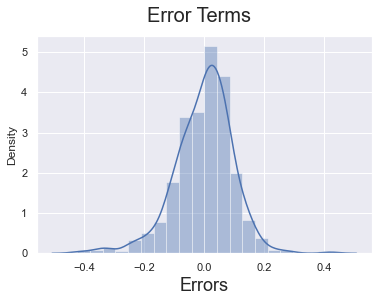

In [95]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Centered around Zero, and normal.

## Prediction and evaluation

In [96]:
#Scaling the test data

#Creating list of numaric variables
num_vars=['temp','humidity','windspeed','count']

#Transforming the data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])

bike_test.head()


,yr,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [97]:
bike_test.describe()

,yr,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [98]:
#creating X and y
y_test = bike_test.pop('count')
X_test = bike_test

In [99]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'spring', 'summer', 'winter', 'Light Snow', 'Mist', 'Mon', 'Sat', 'Sun',
       'Thu', 'Tue', 'Wed', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar',
       'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

In [100]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_final.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [101]:
# Making predictions
y_test_pred = lm17.predict(X_test_new)

Text(0, 0.5, 'y_test_pred')

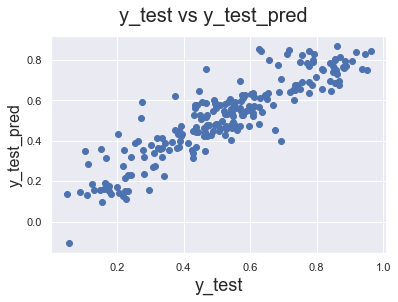

In [102]:
#Cheaking PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

### since, actual and predicted count overlap significantly, thus indicating model is able to explain the change in demand

In [103]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_test_pred)
r_squared


0.8015378931917061

In [104]:
#calculating R2 Adjusted for test
r_ad=1-(1-r2_score(y_test, y_test_pred))*((len(X_test)-1)/(len(X_test)-len(X_test.columns)-1))
r_ad

0.7722908458725891

#### The test result (R-squared value of test)is 0.801 and Adj. R-squared is 0.7722.

#### R-square of our model is 0.810 Adj. R-squared is 0.808.

### since test result resembels with model, we can conclude that the model was generalised well.

In [105]:
print(X_train_rfe17.columns)
print(lm17.summary())

Index(['const', 'yr', 'holiday', 'spring', 'Light Snow', 'Mist', 'Sep',
       'temp'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     306.5
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.02e-176
Time:                        23:38:30   Log-Likelihood:                 462.50
No. Observations:                 510   AIC:                            -909.0
Df Residuals:                     502   BIC:                            -875.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

### We can see that the equation for best fitted line is:
## count= 0.2356 X yr - 0.093 X holiday - 0.1576 X spring - 0.2934 X Light snow - 0.0781 X Mist +0.0766 X Sep + 0.3562 X temp


1.We can see the demand for bikes depends mainly on below variables:

    1.yr
    2.holiday
    3.spring
    4.Light Snow
    5.Mist
    6.Sep
    7.temp

2.Demands increases in the month of sep.

3.Demand decreases if it is holiday , Spring, Light snow and Mist.


### Final recommendations for the company:

As per our final Model, the top 4 predictor variables that influences the bike booking are:

Holiday - A coefficient value of ‘-0.093’ indicated that a unit increase in temp variable decreases the bike hire numbers by 0.093 units. 

Light snow- A coefficient value of ‘-0.3934’ indicated that a unit increase in Light snow variable decreases the bike hire numbers by 0.3934 units.

Temperature (temp) - A coefficient value of ‘0.3562’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.3562 units. 

Year (yr) - A coefficient value of ‘0.2356’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2356 units.

--- SO IT IS RECOMMENDED TO GIVE THESE VARIABLES UTMOST IMPORTANCE WHILE PLANNING, TO ACHIEVE MAXIMUM BOOKING.


------ end ------